<a href="https://colab.research.google.com/github/pramodkumhal/ML-Practice/blob/main/Linear-Regression/Regression_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Metrics

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [240]:
df = pd.read_csv("/content/Placement.csv")

In [241]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


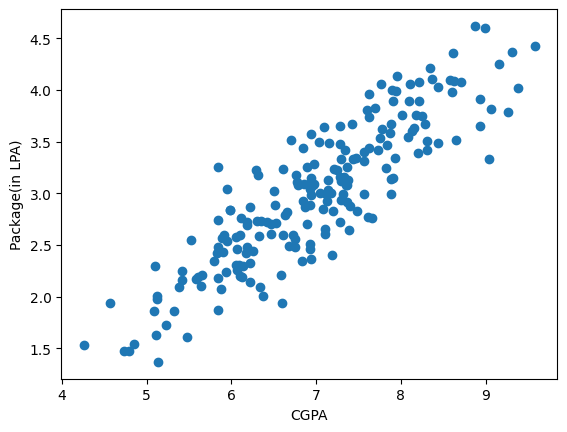

In [242]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel('Package(in LPA)')
plt.show()

In [243]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [244]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [246]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [248]:
X_train.head()

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77


In [249]:
from sklearn.linear_model import LinearRegression

In [250]:
lr = LinearRegression()

In [251]:
lr.fit(X_train,y_train)

LinearRegression()

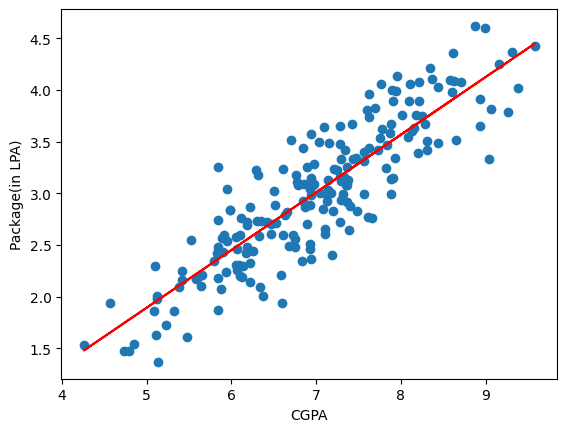

In [252]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel("CGPA")
plt.ylabel('Package(in LPA)')
plt.show()

In [253]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [254]:
y_pred = lr.predict(X_test)

In [255]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [256]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [257]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [258]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [259]:
print("R2_score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2_score 0.780730147510384


In [260]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [261]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [262]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.968898,3.26
1,5.12,0.400372,1.98
2,7.82,0.134979,3.25
3,7.42,0.553147,3.67
4,6.94,0.341243,3.57


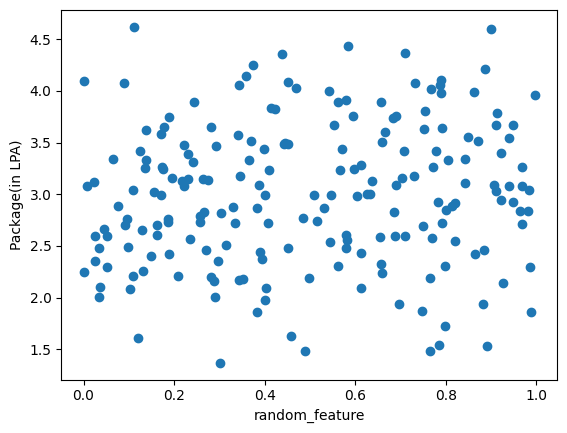

In [263]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel("random_feature")
plt.ylabel('Package(in LPA)')
plt.show()

In [264]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [265]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [266]:
lr = LinearRegression()

In [267]:
lr.fit(X_train,y_train)

LinearRegression()

In [268]:
y_pred = lr.predict(X_test)

In [269]:
print('R2 score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.782370043786967


In [270]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7706062623700463

In [271]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.head()

,cgpa,iq,package
0,6.89,3.06,3.26
1,5.12,2.68,1.98
2,7.82,4.35,3.25
3,7.42,3.97,3.67
4,6.94,2.67,3.57


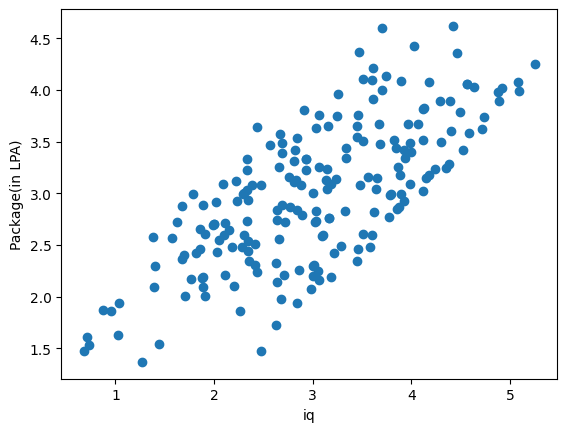

In [272]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel("iq")
plt.ylabel('Package(in LPA)')
plt.show()

In [273]:
np.random.randint(-100,100)

-24

In [274]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [276]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [277]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)

In [278]:
print('R2 score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8057464420117442


In [279]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7952462496880547